In [21]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [22]:
%pylab inline

plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["figure.dpi"] =  150

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [23]:
import pandas as pd

In [24]:
from tensorpotential.utils import *

# Initialize

In [25]:
fit_dict={}

# Add new fits here

In [28]:
folders=discovery_fit_folders(".")
folders

['./seed/2', './seed/3', './seed/1']

# Rerun to update

In [29]:
update_fit_metrics(fit_dict, folders)

./seed/2: 70 epochs
./seed/3: 70 epochs
./seed/1: 570 epochs


In [30]:
fkey="mae/depa"

In [31]:
common_prefix,df, gdf=process_fit_dict(fit_dict, fkey=fkey, align_folder=True)

In [32]:
df[["name","mae/depa","mae/f_comp",
   
    "epoch"]].sort_values(fkey).head(50)

,name,mae/depa,mae/f_comp,epoch
59,./seed/3,0.007072,0.012046,60.0
65,./seed/2,0.008411,0.011148,66.0
567,./seed/1,0.012084,0.007611,68.0


In [33]:
# gdf

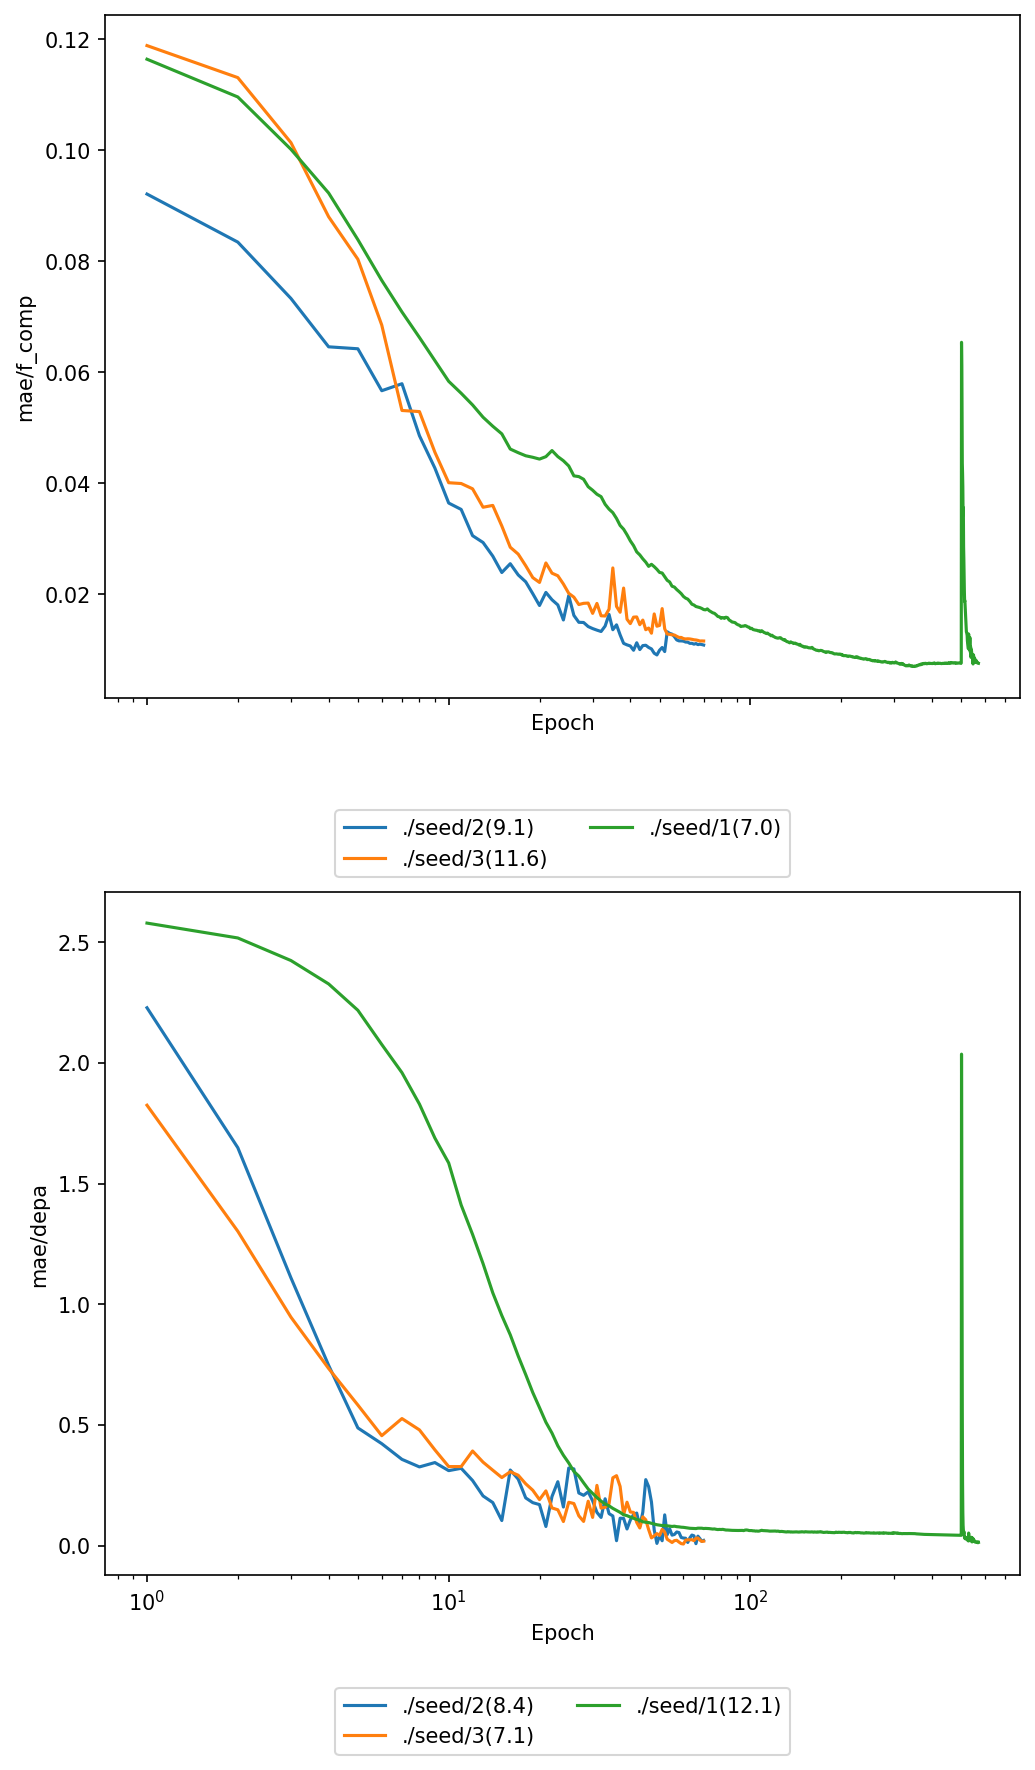

In [34]:
fig, ax_e, ax_f = plot_dashboard(fit_dict,
                                 plot_train=False,
                                 label="shortname_and_seed", 
                                 metric="mae" # 
                                )
ax_e.legend(ncol=2, bbox_to_anchor=(0.5,-0.15), loc="upper center")
ax_f.legend(ncol=2, bbox_to_anchor=(0.5,-0.15), loc="upper center")


ax_e.set_xscale('log')
fig.suptitle(common_prefix)
fig.tight_layout()